# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("/workspaces/Random-Forest/dataset_procesado.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1


In [3]:
print(data.shape)
print(data.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


entrenamiento del modelo para Random fo

In [6]:
#  1. Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

#  2. Cargar el dataset procesado
total_data = pd.read_csv("/workspaces/Random-Forest/dataset_procesado.csv")

#  3. Definir variables predictoras (X) y objetivo (y)
X = total_data.drop(columns=["Outcome"])
y = total_data["Outcome"]

#  4. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# 5. Selección de características con SelectKBest (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=7)
selector.fit(X_train, y_train)

#  Columnas seleccionadas
selected_columns = X_train.columns[selector.get_support()]
print(f"Columnas seleccionadas: {selected_columns.tolist()}")

#  6. Transformar conjuntos de entrenamiento y prueba
X_train_sel = pd.DataFrame(selector.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selector.transform(X_test), columns=selected_columns)

#  7. Guardar conjuntos seleccionados
X_train_sel.to_csv("/workspaces/Random-Forest/X_train_sel.csv", index=False)
X_test_sel.to_csv("/workspaces/Random-Forest/X_test_sel.csv", index=False)
y_train.to_csv("/workspaces/Random-Forest/y_train.csv", index=False)
y_test.to_csv("/workspaces/Random-Forest/y_test.csv", index=False)

print("Conjuntos seleccionados guardados con éxito.")


Columnas seleccionadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Conjuntos seleccionados guardados con éxito.


In [5]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 📌 1. Definir el modelo base de RandomForest
model_rf = RandomForestClassifier(random_state=42)

# 📌 2. Definir el rango de parámetros para explorar con GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],  # Número de árboles
    "max_depth": [10, 20, 30, None],  # Profundidad máxima de los árboles
    "min_samples_split": [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],    # Mínimo número de muestras por hoja
    "max_features": ['sqrt', 'log2', None]  # Número de características a considerar
}

# 📌 3. Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, 
                           cv=5,              # 5 veces cross-validation
                           n_jobs=-1,         # Usar todos los núcleos del procesador
                           verbose=2,         # Mostrar progreso
                           scoring='accuracy') # Métrica de evaluación

# 📌 4. Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_sel, y_train)  # Usamos X_train_sel (selección de características)

# 📌 5. Ver los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# 📌 6. Obtener el mejor modelo y evaluar su rendimiento
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_sel, y_test)
print(f"Precisión del modelo optimizado: {accuracy:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min

In [24]:
model_rf = RandomForestClassifier(max_depth= 20, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 50, random_state = 42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=50,
                       random_state=42)

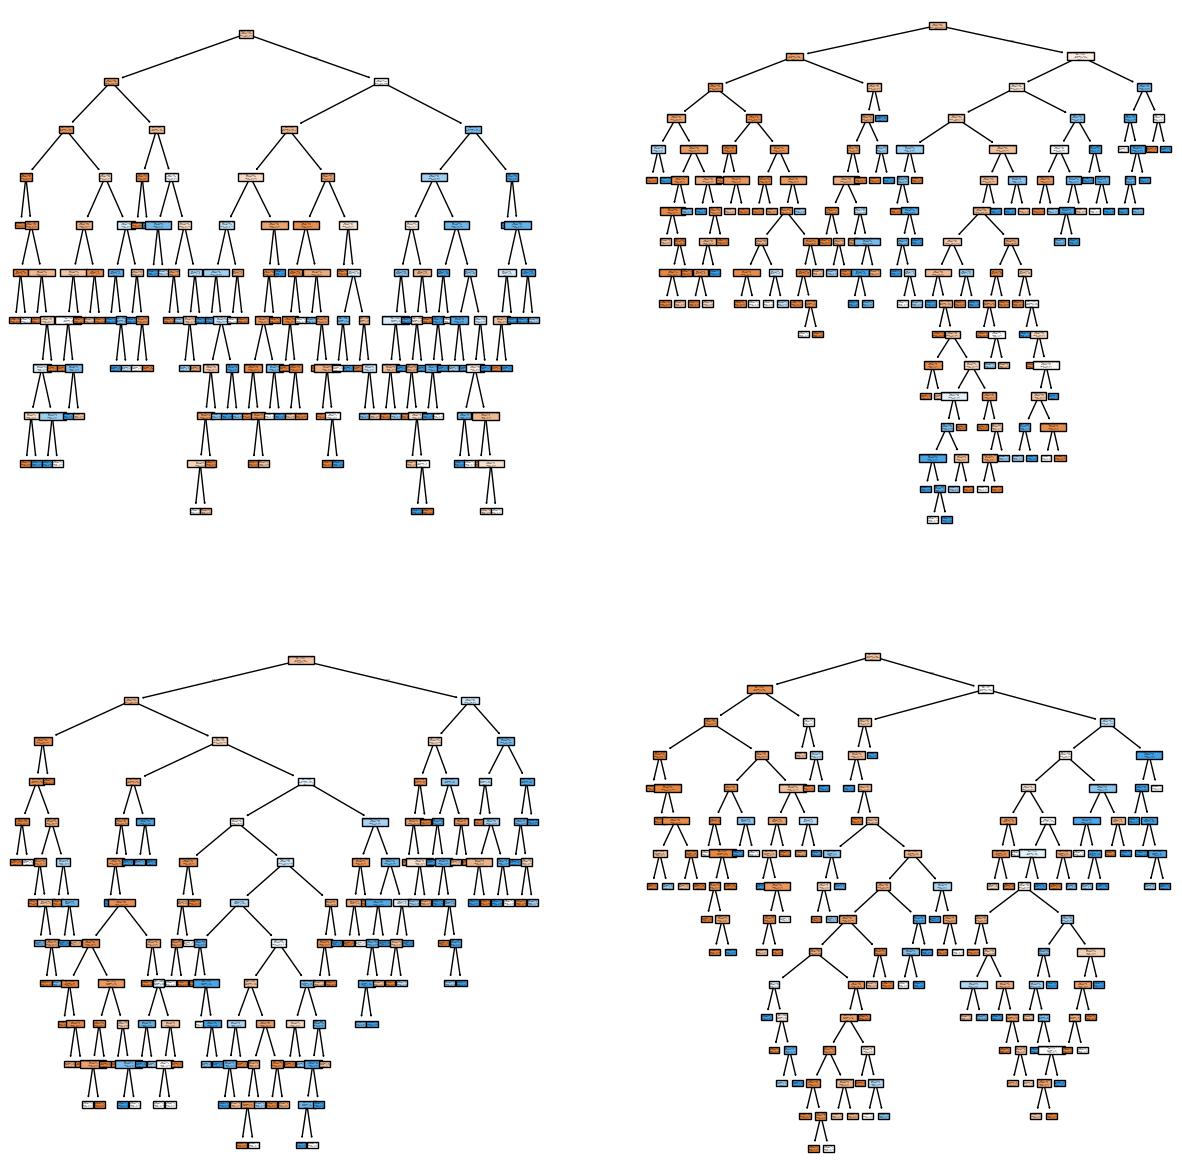

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model_rf.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rf.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rf.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rf.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [26]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf


array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [27]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_rf)


0.7402597402597403

In [30]:
from pickle import dump

dump(model_rf, open("../models/random_forest_classifier_default_42.sav", "wb"))